### Histograma

**Valor-Z**

Na Estatística, um Valor-Z (escore-Z ou escore padrão) de uma observação é o **número de desvios padrão** acima ou abaixo da média da população. Para calcular um escore z, é necessário saber a média da população e o desvio padrão da população.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("CompanyABCProfit.csv")

In [3]:
df.head()

,Year,Profit(Rs '000)
0,1821,1645
1,1822,658
2,1823,1926
3,1824,865
4,1825,764


In [4]:
df.columns = ['ano','lucro']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ano     200 non-null    int64
 1   lucro   200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


In [6]:
def plot_hist(df,column,bars):
    x = df[column].values
    first = int(x.min())
    last = int(x.max())
    interval = (last-first)/bars
    
    tick=[first]
    elem = first
    for i in range(1,bars):
        elem += interval
        tick.append(elem)

    tick.append(last)
    
    df[column].plot.hist(bins=bars,rwidth=(0.9))
    plt.xticks(tick)
    plt.title('Distribuição de '+column.capitalize())
    plt.xlabel(column.capitalize())
    plt.grid(axis='y')
    return plt.show()

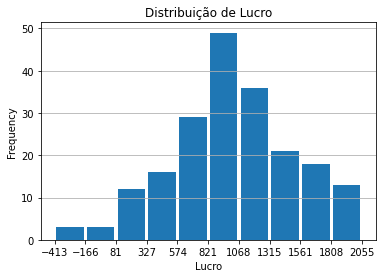

In [7]:
plot_hist(df,'lucro',10)

In [ ]:
df.lucro.mode()

In [9]:
df.lucro.describe()

count     200.000000
mean     1021.990000
std       487.955626
min      -413.000000
25%       724.250000
50%      1024.000000
75%      1318.250000
max      2055.000000
Name: lucro, dtype: float64

In [ ]:
sns.distplot(df['lucro'], fit=norm, kde=False)

### Calculando Z

#### Qual a probabilidade de uma pessoa ter 32 anos de idade ou menos?

<img src="Tabela+Z.jpg">

In [ ]:
media = df.lucro.mean()
std = df.lucro.std()

media, std

In [ ]:
x = 1000
z = (x-media)/std
z

In [ ]:
prob = 0.6460

In [ ]:
def distribution(df,column, ponto= 1000,point=1200,rule=True):
    media = df[column].mean()
    std = df[column]. std()
    sns.distplot(df[column], fit=norm, kde=False)
    plt.axvline(media, 0,0.8, color='red',linewidth=4)
    plt.axvline(ponto, 0,0.8, color='yellow',linewidth=4)
    if point != None:
        plt.axvline(point, 0,0.8, color='yellow',linewidth=4)
    if rule:
        plt.axvline(media-std, 0,0.5,color='purple',linewidth=3)
        plt.axvline(media+std, 0,0.5,color='purple',linewidth=3)
        plt.axvline(media-2*std, 0,0.1,color='blue',linewidth=3)
        plt.axvline(media+2*std, 0,0.1,color='blue',linewidth=3)
        plt.axvline(media-3*std, 0,0.05,color='forestgreen',linewidth=3)
        plt.axvline(media+3*std, 0,0.05,color='forestgreen',linewidth=3)
    return plt.show()

In [ ]:
distribution(df,'lucro')